## Question 1 <a id="section3"></a>
### Model for open chain design <a id="subsection3.1"></a>
Suppose the capacity at plant $i$ is $C_i$ and the demand for product $j$ is $D_j$. Then, the network formulation for maximizing sales given demands is:
\begin{equation}
\begin{split}
\max~ & \sum_{(i,j)\in A}x_{ij} \\
s.t. ~& \sum_{j:(i,j)\in A}x_{ij} \leq C_i\\
& \sum_{i:(i,j)\in A}x_{ij} \leq D_j\\
& x_{ij}\geq 0.
\end{split}
\end{equation}
We consider the following setup.
<div class="alert alert-block alert-success">
Consider the case with 6 plants and 6 products, and plant $i$ is able to produce product $i$ and $i+1$, $i=1,...,5$.Plant $6$ can produce only product $6$. The capacities and demands are 

\begin{equation}
    D_j=\max\{X_j,0\}
\end{equation}
\begin{equation}
        X_j \sim \mathcal{N}(100,30^2),
\end{equation}
\begin{equation}
        C_i = 100, ~i=1,...,6
\end{equation}
</div> 
<div class="alert alert-block alert-success">
The random variables $X_i, i=1,...6$ are identical and independent (i.i.d.) with mean $100$ and standard deviation $30$, i.e., 
\begin{equation}
        \mu_i = 100, ~i=1,...,6,
\end{equation}
and
\begin{equation}
        \Sigma = 
        \left[
        \begin{array}{cccccc}
        900 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 900 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 900 & 0 & 0 & 0 \\
        0 & 0 & 0 & 900 & 0 & 0 \\
        0 & 0 & 0 & 0 & 900 & 0 \\
        0 & 0 & 0 & 0 & 0 & 900 \\
        \end{array}
        \right]
\end{equation}
</div>

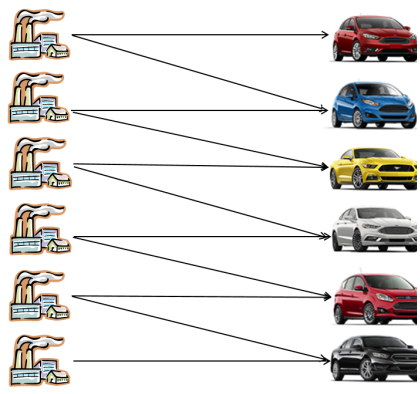

In [1]:
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#########Setup the model parameters############

supply = np.array([100, 100, 100, 100, 100, 100])
demand = np.zeros(6)
ARCS = tuplelist([(0,0), (0,1), (1,1), (1,2), (2,2), (2,3), (3,3), (3,4), (4,4), (4,5), (5,5)])

N = len(supply)
M = len(demand)

### Setting up the parameters for demand
# Mean vector of the demand
mean = np.array([100, 100, 100, 100, 100, 100])

# Covariance matrix of the demand (independent with s.d. 30)
cov = np.array([[900, 0, 0, 0, 0, 0], 
                [0, 900, 0, 0, 0, 0],
                [0, 0, 900, 0, 0, 0],
                [0, 0, 0, 900, 0, 0],
                [0, 0, 0, 0, 900, 0],
                [0, 0, 0, 0, 0, 900]])

#########Model Set-up Using Function###############

def model_setup():
    
    m = Model("Open_Chain_Design")
    
    # Number of units of product j to be produced by plant i
    x = m.addVars(ARCS, name = "x")

    # set objective
    m.setObjective( quicksum(x[i,j] for (i,j) in ARCS), GRB.MAXIMIZE)

    # capcity constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select(i,'*')) <= supply[i] for i in range(N)), "capacity")

    # demand constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select('*',j)) <= demand[j] for j in range(M) ), "demand")
    
    #Supressing the optimization output
    m.setParam( 'OutputFlag', False )
    
    return m

Sample_Size = 1000
sales_open_chain = np.zeros(Sample_Size)

for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    # setup the model again
    m = model_setup()

    # solving the model
    m.optimize()
    
    # store the maximum sales for the i-th sample
    sales_open_chain[i] = m.objVal

# compute the average of maximum sales
avg_sales_open_chain = np.average(sales_open_chain)    

print('Average maximum sales for open chain system:', avg_sales_open_chain)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-05
Average maximum sales for open chain system: 556.6053216351868


### Model for long chain design <a id="subsection3.1"></a>
Suppose the capacity at plant $i$ is $C_i$ and the demand for product $j$ is $D_j$. Then, the network formulation for maximizing sales given demands is:
\begin{equation}
\begin{split}
\max~ & \sum_{(i,j)\in A}x_{ij} \\
s.t. ~& \sum_{j:(i,j)\in A}x_{ij} \leq C_i\\
& \sum_{i:(i,j)\in A}x_{ij} \leq D_j\\
& x_{ij}\geq 0.
\end{split}
\end{equation}
We consider the following setup.
<div class="alert alert-block alert-success">
Consider the case with 6 plants and 6 products, and plant $i$ is able to produce product $i$ and $i+1$, $i=1,...,5$.Plant $6$ can produce products $6$ & $1$. The capacities and demands are 

\begin{equation}
    D_j=\max\{X_j,0\}
\end{equation}
\begin{equation}
        X_j \sim \mathcal{N}(100,30^2),
\end{equation}
\begin{equation}
        C_i = 100, ~i=1,...,6
\end{equation}
</div> 
<div class="alert alert-block alert-success">
The random variables $X_i, i=1,...6$ are identical and independent (i.i.d.) with mean $100$ and standard deviation $30$, i.e., 
\begin{equation}
        \mu_i = 100, ~i=1,...,6,
\end{equation}
and
\begin{equation}
        \Sigma = 
        \left[
        \begin{array}{cccccc}
        900 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 900 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 900 & 0 & 0 & 0 \\
        0 & 0 & 0 & 900 & 0 & 0 \\
        0 & 0 & 0 & 0 & 900 & 0 \\
        0 & 0 & 0 & 0 & 0 & 900 \\
        \end{array}
        \right]
\end{equation}
</div>

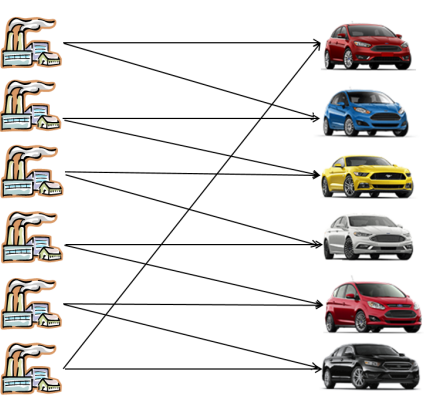

In [2]:
from gurobipy import *
import numpy as np
import inspect

#########Setup the model parameters############

supply = np.array([100, 100, 100, 100, 100, 100])
demand = np.zeros(6)
ARCS = tuplelist([(0,0), (0,1), (1,1), (1,2), (2,2), (2,3), (3,3), (3,4), (4,4), (4,5), (5,5), (5,1)])

N = len(supply)
M = len(demand)

### Setting up the parameters for demand
# Mean vector of the demand
mean = np.array([100, 100, 100, 100, 100, 100])

# Covariance matrix of the demand (independent with s.d. 30)
cov = np.array([[900, 0, 0, 0, 0, 0], 
                [0, 900, 0, 0, 0, 0],
                [0, 0, 900, 0, 0, 0],
                [0, 0, 0, 900, 0, 0],
                [0, 0, 0, 0, 900, 0],
                [0, 0, 0, 0, 0, 900]])

#########Model Set-up Using Function###############

def model_setup():
    
    m = Model("Long_Chain_Design")
    
    # Number of units of product j to be produced by plant i
    x = m.addVars(ARCS, name = "x")

    # set objective
    m.setObjective( quicksum(x[i,j] for (i,j) in ARCS), GRB.MAXIMIZE)

    # capcity constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select(i,'*')) <= supply[i] for i in range(N)), "capacity")

    # demand constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select('*',j)) <= demand[j] for j in range(M) ), "demand")
    
    #Supressing the optimization output
    m.setParam( 'OutputFlag', False )
    
    return m

Sample_Size = 1000
sales_long_chain = np.zeros(Sample_Size)

for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    # setup the model again
    m = model_setup()

    # solving the model
    m.optimize()
    
    # store the maximum sales for the i-th sample
    sales_long_chain[i] = m.objVal

# compute the average of maximum sales
avg_sales_long_chain = np.average(sales_long_chain)    

print('Average maximum sales for long chain system:', avg_sales_long_chain)

Average maximum sales for long chain system: 565.7058656930662


Text(0, 0.5, 'Frequency')

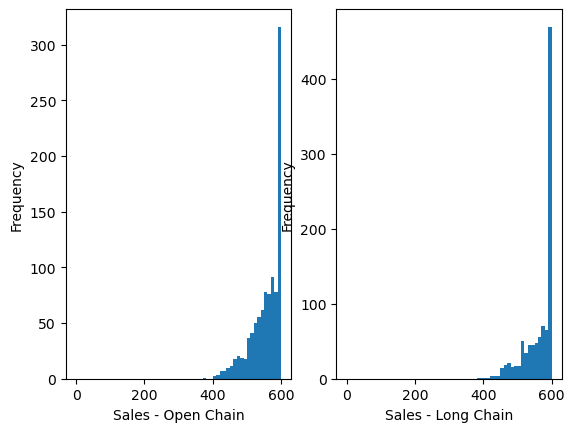

In [3]:
# visiualizing the sales over all samples
fig, ax = plt.subplots(1,2);

plt.rcParams["figure.figsize"] = (10,5)

ax[0].hist(sales_open_chain, bins = 60, range = (0, 600))
ax[0].set_xlabel('Sales - Open Chain')
ax[0].set_ylabel('Frequency')

ax[1].hist(sales_long_chain, bins = 60, range = (0, 600))
ax[1].set_xlabel('Sales - Long Chain')
ax[1].set_ylabel('Frequency')

In [4]:
print('Average maximum sales for open chain system:', avg_sales_open_chain)
print('Average maximum sales for long chain system:', avg_sales_long_chain)

Average maximum sales for open chain system: 556.6053216351868
Average maximum sales for long chain system: 565.7058656930662


Comparing the two systems, we note that the long chain system is able to achieve greater sales on average than the open chain system. At the same time the long chain system is also more resilient to variations in demand as higher sales are achieved more frequently than in the case of open chain.

## Question 2
### a)

We have the following inventory decisions which have been made  
<div class="alert alert-block alert-success">
\begin{equation}    
Jurong West: 300  
\end{equation}   
\begin{equation}    
Orchard: 500      
\end{equation}
\begin{equation}    
Harbour Front: 500  
\end{equation}
</div>
<div class="alert alert-block alert-success">
Our Demand is given by
\begin{equation}
    D_j=\max\{X_j,0\}
\end{equation}
\begin{equation}
        (X_1,X_2,X_3) \sim \mathcal{N}(\mu,\Sigma),
\end{equation}
where
\begin{equation}
        \mu = [300,500,500]
\end{equation}
and
\begin{equation}
        \Sigma = 
        \left[
        \begin{array}{cccccc}
        400 & 0 & 0\\ 
        0 & 400 & 0\\ 
        0 & 0 & 1600\\
        \end{array}
        \right]
\end{equation}
    
</div>

The sales price of each unit is \\$100 and the purchase price is \\$50, hence, the profit per unit of sale is \\$50

The expected profit under this configuration can be calculated as

In [5]:
supply = np.array([300,500,500])
demand = np.zeros(3)
profits = np.zeros(Sample_Size)

# Mean vector of the demand
mean = np.array([300, 500, 500])

# Covariance matrix of the demand (independent with s.d. 30)
cov = np.array([[400, 0, 0],
                [0, 400, 0],
                [0, 0 ,1600]])


def expected_profit(Sample_Size):
    profits = np.zeros(Sample_Size)
    
    for i in range(Sample_Size):
        
        demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
        sales = np.minimum(demand, supply)
        profits[i] = (np.sum(sales) * 100) - 65000
     
    return profits

profits = expected_profit(1000)
avg_profits = np.average(profits)
max_profits = np.amax(profits)
print('Average average profit for the given inventory configuration: {:.2f}'.format(avg_profits))
print('Maximum profit for the given inventory configuration is: {:.2f}'.format(max_profits))

Average average profit for the given inventory configuration: 61793.59
Maximum profit for the given inventory configuration is: 65000.00


Text(0, 0.5, 'Frequency')

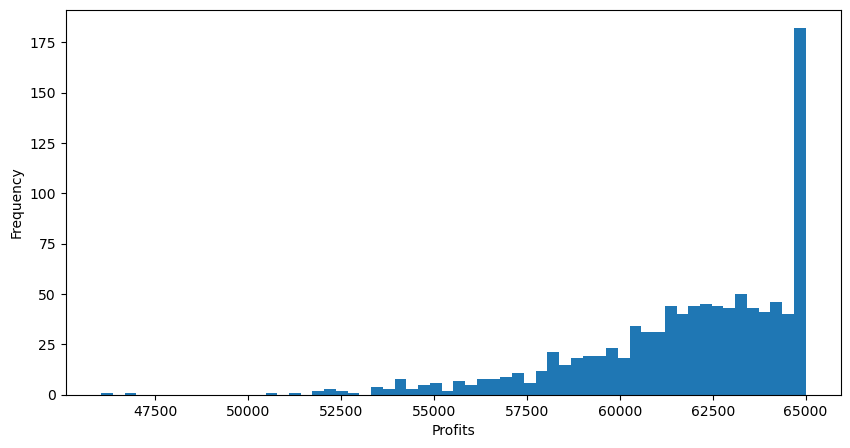

In [6]:
plt.hist(profits, bins = 60)
plt.xlabel('Profits')
plt.ylabel('Frequency')

### b)
If there is no demand uncertainty, then our demand is not a random variable but a fixed a vector. Additionally, the supply and demand are the same in each of the locations. Hence, in this situation, the expected profit is just the profit obtained by selling the entire inventory, i.e.,
\begin{equation}
Profits = (300 + 500 + 500) * 50
\end{equation}

Hence, the total expected profit is 
\begin{equation}
\\$65,000
\end{equation}

<
### c)

The option of a transshipment company opens allows the retailer to adjust for unexpected changes in demand during the selling season. However, taking this option is feasible only if the increase in revenue from additional sales is able to balance out the increase in ocsts due to the service. To test the possibility of being able to maximize profits, we use the following model

\begin{equation}
\begin{split}
\max~ & \sum_{i=1}^3\sum_{j=1}^3 (100 - c_{ij})x_{ij} - 200 - 65000 \\
s.t. ~& \sum_{j=1}^3x_{ij} \leq S_i, ~ i = 1,2,3\\
& \sum_{i=1}^3x_{ij} \leq D_j, ~ j = 1,2,3\\
& x_{ij}\geq 0.
\end{split}
\end{equation}

Where $c_{ij}$ is the unit cost of transhipping one item from location $i$ to location $j$; $S_{i}$ is the number of units stocked at location $i$; $D_{i}$ is the demand realized at location $i$ and $x_{ij}$ is the number of units from location $i$ sold at location $j$


<div class="alert alert-block alert-success">
Therefore the Supply Vector is
\begin{equation}
        S = 
        \left[
        \begin{array}{c}
        300\\ 
        500\\
        500\\
        \end{array}
        \right]
\end{equation}

Our Demand is given by
\begin{equation}
    D_j=\max\{X_j,0\}
\end{equation}
\begin{equation}
        (X_1,X_2,X_3) \sim \mathcal{N}(\mu,\Sigma),
\end{equation}
where
\begin{equation}
        \mu = [300,500,500]
\end{equation}
and
\begin{equation}
        \Sigma = 
        \left[
        \begin{array}{cccccc}
        400 & 0 & 0\\ 
        0 & 400 & 0\\ 
        0 & 0 & 1600\\
        \end{array}
        \right]
\end{equation}

Finally, the cost matrix is 
\begin{equation}
        C = 
        \left[
        \begin{array}{cccccc}
        0 & 22 & 19\\ 
        22 & 0 & 7\\ 
        19 & 7 & 0\\
        \end{array}
        \right]
\end{equation}
</div>

In [7]:
#########Parameters Set-up############

#Objective coefficient: transportation cost from supply node i to demand node j
cost = np.array([[0, 22, 19],
                [22, 0, 7], 
                [19, 7, 0]])


#supply and demand
supply = np.array([300, 500, 500])

demand = np.zeros(3)

# Mean vector of the demand
mean = np.array([300, 500, 500])

# Covariance matrix of the demand (independent with s.d. 30)
cov = np.array([[400, 0, 0],
                [0, 400, 0],
                [0, 0 ,1600]])
#From the cost matrix, extract the number of supply nodes: M and the number of demand nodes: N
M, N = cost.shape


#########Model Set-up###############
def model_setup(demand):
    
    m = Model("Transshipment")
    
    # Number of units of product j to be produced by plant i
    x = m.addVars(M,N , name = "x")

    # set objective
#     m.setObjective(quicksum((100 - cost[i,j])*x[i,j] for i in range(M) for j in range(N)) - 200 - 65000, GRB.MAXIMIZE
    m.setObjective((quicksum((100 - cost[i,j])*x[i,j] for i in range(M) for j in range(N)) - 200 - 65000), GRB.MAXIMIZE)


    # Add supply constraints
    m.addConstrs((quicksum(x[i,j] for j in range(N)) <= supply[i] for i in range(M) ), "Supply")

    # demand constraint: 
    m.addConstrs(( quicksum(x[i,j] for i in range(M)) <= demand[j] for j in range(N) ), "Demand")
    
    #Supressing the optimization output
    m.setParam( 'OutputFlag', False )
    
    return m

########Calculate Profit for one realization of demand#######
def run_model(demand):
    
    m = model_setup(demand)
    m.optimize()
    return m.ObjVal
    
#####Run model for a sample sizes and return average profit#####
def expected_profit_transshipment(Sample_Size):
    profits = np.zeros(Sample_Size)
    
    for i in range(Sample_Size):
        demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
        profits[i] = run_model(demand)
        
    return profits

# profits = expected_profit_transshipment(1000)
# avg_profits = np.average(profits)
# max_profits = np.amax(profits)
# print('Average average profit for the given inventory configuration: {:.2f}'.format(avg_profits))
# print('However, maximum profit for the given inventory configuration is: {:.2f}'.format(max_profits))

Because of the nature of the problem, our solution may vary based on the demand realization and the sample size. Hence, to compare the two configurations(with and without logistics partner), we simulate both cases for the same demand realizations. Additionally, to test the robustness of the mode, we repeat the same for different sample sizes to better compare the solutions

In [8]:
def compare_one():
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    profit_logistics = run_model(demand)
    sales = np.minimum(demand, supply)
    profit_base = (np.sum(sales) * 100) - 65000
    
    return profit_logistics, profit_base

def compare_several(Sample_Size):
    profit_logistics = np.zeros(Sample_Size)
    profit_base = np.zeros(Sample_Size)
    
    for i in range(Sample_Size):
        profit_logistics[i], profit_base[i] = compare_one()
        
    return profit_logistics, profit_base

def robustness_check(Sizes):
    avg_profits_log = np.zeros(len(Sizes))
    avg_profits_base = np.zeros(len(Sizes))
    max_profits_log = np.zeros(len(Sizes))
    max_profits_base = np.zeros(len(Sizes))
    
    for i in range(len(Sizes)):
        log, base = compare_several(Sizes[i])
        avg_profits_log[i] = np.average(log)
        avg_profits_base[i] = np.average(base)
        max_profits_log[i] = np.amax(log)
        max_profits_base[i] = np.amax(base)
        
    df = pd.DataFrame(data = {'SampleSize' : Sizes,
                              'AvgProfitsLog': avg_profits_log,
                              'AvgProfitsBase': avg_profits_base,
                              'MaxProfitsLog': max_profits_log,
                              'MaxProfitsBase': max_profits_base})
    
    return df

We first use the defacto sample size of 1000 to compare the two configurations. Later on, we shall simulate the same results for various sample sizes to test if our conclusion holds in each case

In [9]:
log, base = compare_several(1000)

avg_profits_log = np.average(log)
max_profits_log = np.amax(log)
avg_profits_base = np.average(base)
max_profits_base = np.amax(base)

print('Average average profit before adopting the service: {:.2f}'.format(avg_profits_base))
print('Maximum profit before adopting the service: {:.2f}'.format(max_profits_base))
print('Average average profit aftering adopting the service: {:.2f}'.format(avg_profits_log))
print('Maximum profit after adopting the service: {:.2f}'.format(max_profits_log))

Average average profit before adopting the service: 61885.29
Maximum profit before adopting the service: 65000.00
Average average profit aftering adopting the service: 62740.55
Maximum profit after adopting the service: 64800.00


Text(0, 0.5, 'Frequency')

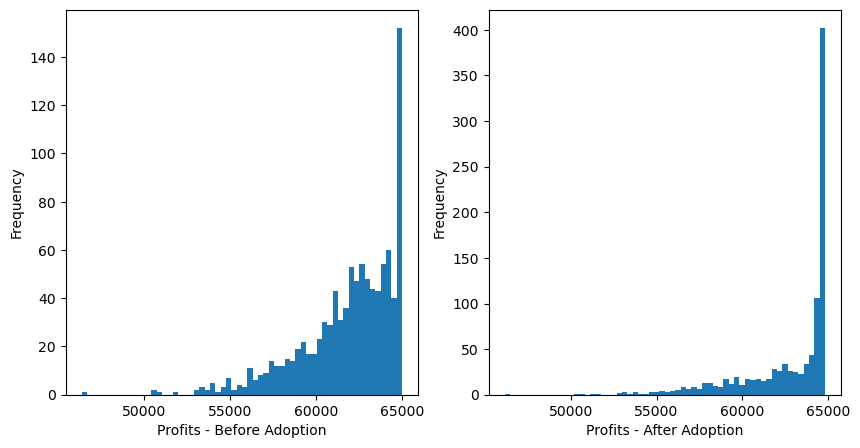

In [10]:
# visiualizing the sales over all samples
fig, ax = plt.subplots(1,2);

plt.rcParams["figure.figsize"] = (10,5)

ax[0].hist(base, bins = 60)
ax[0].set_xlabel('Profits - Before Adoption')
ax[0].set_ylabel('Frequency')

ax[1].hist(log, bins = 60)
ax[1].set_xlabel('Profits - After Adoption')
ax[1].set_ylabel('Frequency')

We observe the following:

1. On average, adopting the service delivers a higher profit 
2. However, due to the fixed cost of \$200, the maximum profit that can be acheived is lesser
3. From the charts, we observe that adopting the service allows us to achieve the higher profits more frequently, suggesting that adding the flexibility to the system makes it more resilient to variations in demand. 

Based on these observations, it can be concluded that it is **beneficial for the retailer to adopt the service**

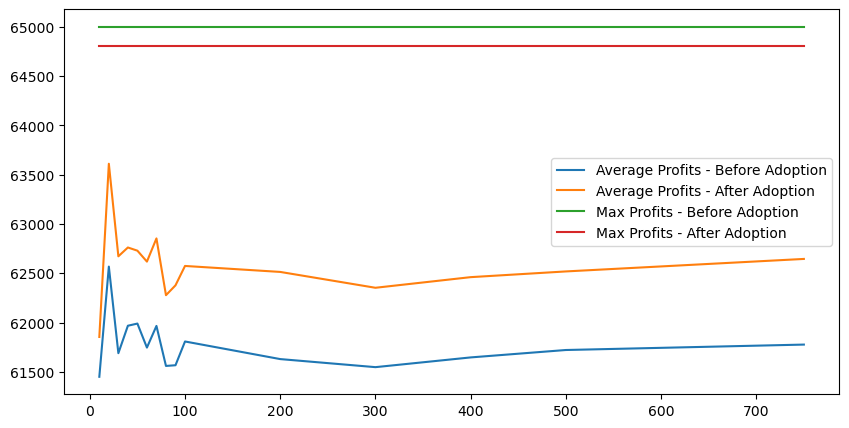

In [11]:
# sizes = np.array([1, 5, 10, 50, 100, 500, 1000, 5000, 10000])
sizes = np.array([10, 20, 30, 40, 50, 60, 70,80,90, 100, 200, 300, 400, 500, 750])

scores = robustness_check(sizes)

plt.plot(scores['SampleSize'], scores['AvgProfitsBase'], label = "Average Profits - Before Adoption")
plt.plot(scores['SampleSize'], scores['AvgProfitsLog'], label = "Average Profits - After Adoption")
plt.plot(scores['SampleSize'], scores['MaxProfitsBase'], label = "Max Profits - Before Adoption")
plt.plot(scores['SampleSize'], scores['MaxProfitsLog'], label = "Max Profits - After Adoption")

plt.legend()
plt.show()                              

We can see that the same conclusion can be drawn for multiple sample sizes. This suggests that our model and method is robust and that the conclusions made above are sound. Based on these observations, we can recommend the retailer to adopt the logistics service

### d)

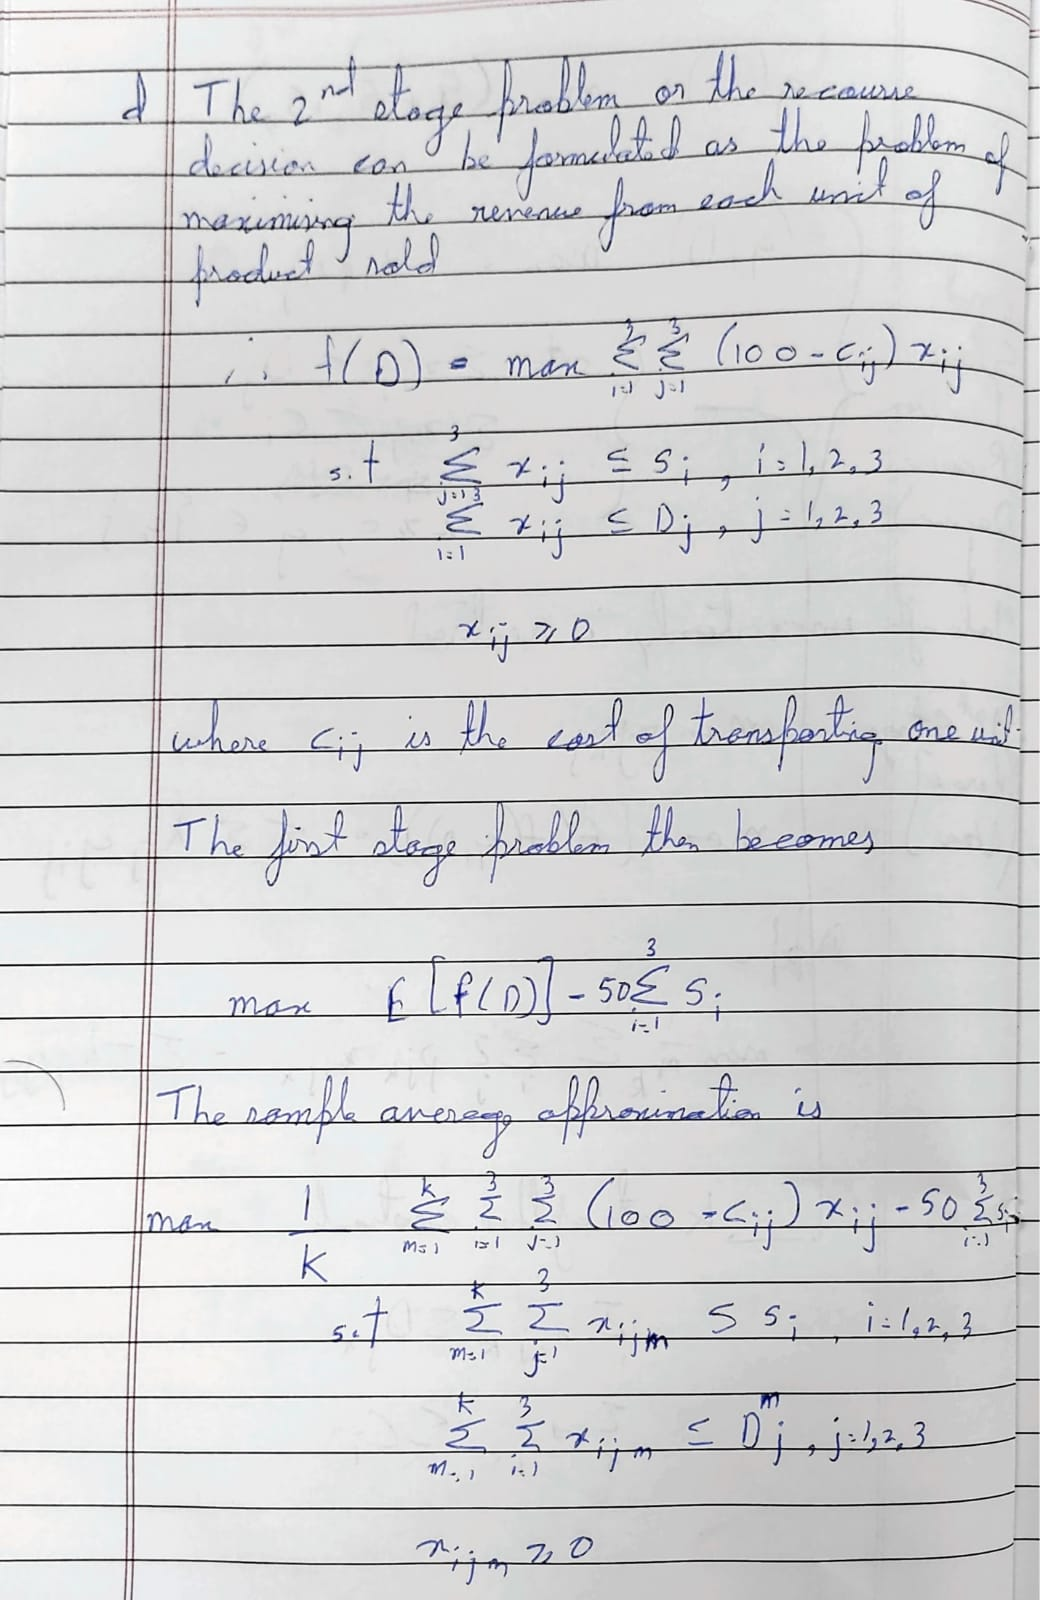

Note - It should be $x_{ijm}$ instead of $x_{ij}$ in the objective of the sample average approximation formulation
Similarly, it should be $f(S,D)$ instead of $f(D)$, i.e, my second stage problem is a function of both supply and demand an not just demand

## Question 3 <a id="section3"></a>

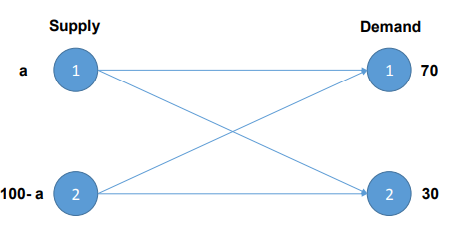

### a)

The objective of the transportation problem is to minimize cost of transportation while making sure that demands are met. The linear programming formation of this problem can be expressed as
\begin{equation}
\begin{split}
\max~ & \sum_{(i,j)\in A}c_{ij}x_{ij} \\
s.t. ~& \sum_{j:(i,j)\in A}x_{1j} = a\\
~& \sum_{j:(i,j)\in A}x_{2j} = 100-a\\
& \sum_{i:(i,j)\in A}-x_{i1} = -70\\
& \sum_{i:(i,j)\in A}-x_{i2} = -30\\
& x_{ij}\geq 0.
\end{split}
\end{equation}

Where $x_{1j}$ is the number of units transported via from node $i$ to node $j$

In matrix form, this can be written as
\begin{equation} 
\max cx\\
s.t. Ax = b\\
x \geq 0
\end{equation}

where
\begin{equation}
        A = 
        \left[
        \begin{array}{cccc}
        1 & 1 & 0 & 0 \\ 
        0 & 0 & 1 & 1 \\ 
        -1 & 0 & -1 & 0 \\ 
        0 & -1 & 0 & -1 \\ 
        \end{array}
        \right]
\end{equation}

\begin{equation}
        x = 
        \left[
        \begin{array}{c}
        x_{11}\\ 
        x_{12}\\
        x_{21}\\
        x_{22}\\
        \end{array}
        \right]
\end{equation}

\begin{equation}
        b = 
        \left[
        \begin{array}{c}
        a\\ 
        100-a\\
        -70\\
        -30\\
        \end{array}
        \right]
\end{equation}

\begin{equation}
        c = 
        \left[
        \begin{array}{c}
        c_{11}\\ 
        c_{12}\\
        c_{21}\\
        c_{22}\\
        \end{array}
        \right]
\end{equation}

### b)
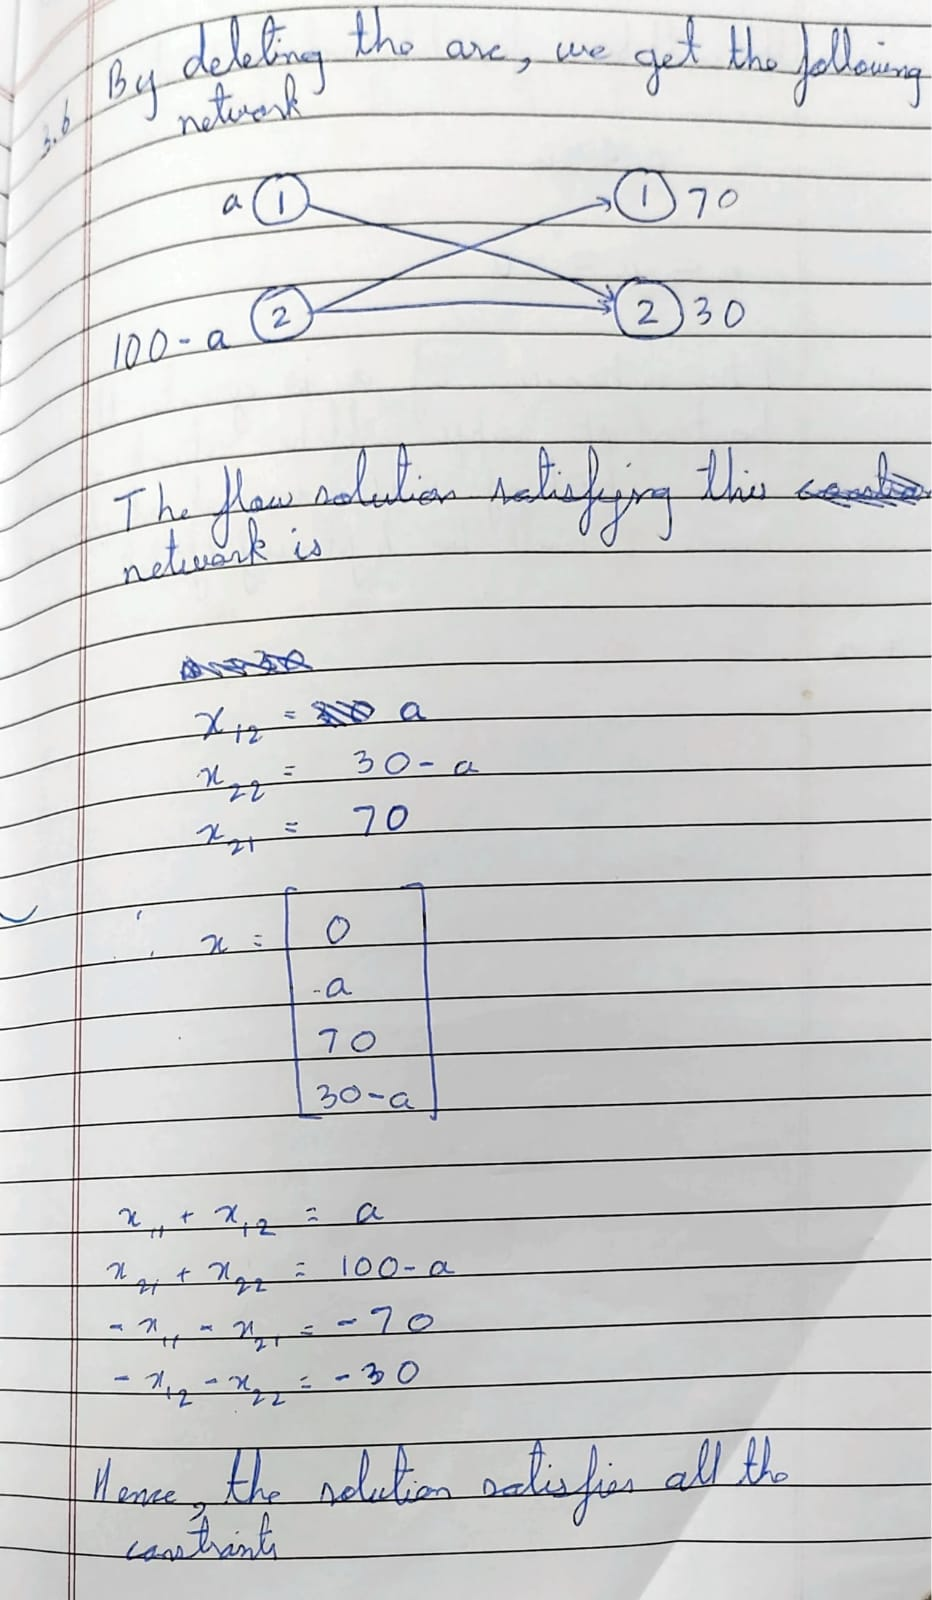

### c)
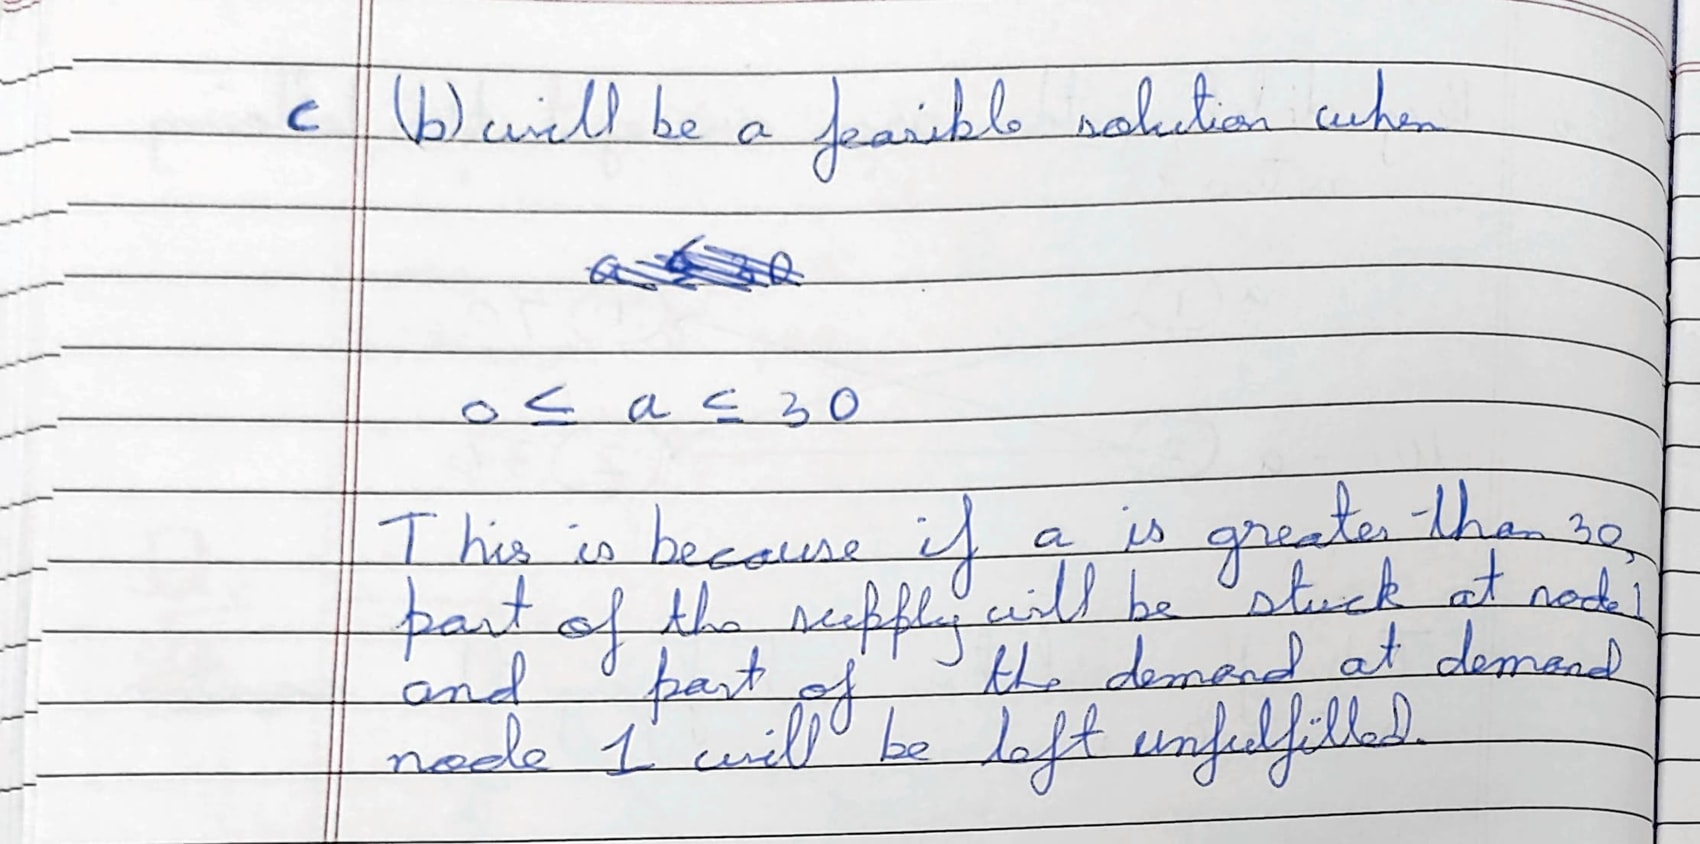

## Question 4 <a id="section3"></a>

a)\begin{equation}
\dfrac{\sum_{i=1}^nx_{i}}{n} \leq z\\
\end{equation}

b) \begin{equation}
\sum_{i=1}^nx_{i} \geq z\\
\end{equation}

c) \begin{equation}
\dfrac{1 + \sum_{i=1}^nx_{i}}{n} \leq z+1\\
\end{equation}

d)\begin{equation}
\dfrac{\sum_{i=1}^nx_{i}}{n} \geq z\\
\end{equation}

e) \begin{equation}
\dfrac{\sum_{i=1}^nx_{i} - 4}{n} \leq z\\
\end{equation}

## Question 5

### a)
The mathematical model for the TSP is given by

\begin{equation}
\begin{split}
\min~ & \sum_{i=1}^n\sum_{j=1}^nc_{ij}x_{ij} \\
s.t. ~& \sum_{i=1}^nx_{ij} =1, ~ j =1,...,n\\
& \sum_{j=1}^nx_{ij} =1, ~ i =1,...,n\\
& u_i + 1 - u_j \leq M(1 - x_{ij}), ~ i\neq j, 1\leq i\leq n, 2\leq j \leq n \\ 
& x_{ij}\in\{0,1\}, u_i\geq 0, i =1,...,n.
\end{split}
\end{equation}

Where $x_{ij}$ is a binary variable indicating if an edge has been travelled, $c_{ij}$ is the cost of travelling from location $i$ to location $j$, and $u_{i}$ is a counter for the number of locations which have been visited at step $i$

In [12]:
#########Parameters Set-up############

#traveling cost from node i to node j
time = np.array([[500, 3, 3, 10, 9, 10],
                 [3, 500, 3, 7, 6, 7], 
                 [3, 3, 500, 7, 6, 7],
                 [10, 7, 7, 500, 1, 2],
                 [9, 6, 6, 1, 500, 1], 
                 [10, 7, 7, 2, 1, 500]])


N = time.shape[0]

#the big M
M = 10000

#########Model Set-up############


tsp = Model("traveling_salesman")

# Creat variables
x = tsp.addVars(N, N, vtype=GRB.BINARY, name = "x")

u = tsp.addVars(N, name = "u")

# Set objective
tsp.setObjective( quicksum(time[i,j]*x[i,j] for i in range(N) for j in range(N)), GRB.MINIMIZE)

# Assignment constraints:
tsp.addConstrs(( quicksum(x[i,j] for j in range(N)) == 1 for i in range(N) ))
 
tsp.addConstrs(( quicksum(x[i,j] for i in range(N)) == 1 for j in range(N) ))

# Subtour-breaking constraints:
tsp.addConstrs(( u[i] + 1 - u[j] <= M*(1 - x[i,j])  for i in range(N) for j in range(1,N) ))


# Solving the model
tsp.optimize()

#  Print optimal x for x nonzero and optimal value
s_edge = []
for v in x:    
    if x[v].x > 0.001:
        print(x[v].VarName, x[v].x)
        #add both of the indicies by 1
        edge = np.add(v, (1,1))
        #append the edge to the resulting list of edges
        s_edge.append(edge)


print('\n------------------------------')
print(s_edge)
print('\n------------------------------')
for v in u: 
    print(u[v].VarName, u[v].x)
    
#  Obtain the permutation as a representation of the tour

permu = np.ones(N)
predecessor = 1
for i in range(N):
    for s in s_edge:
        if s[0] == predecessor:
            permu[i] = s[0]
            predecessor = s[1]
            break    
 

print(permu)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 42 rows, 42 columns and 152 nonzeros
Model fingerprint: 0x8d61dd88
Variable types: 6 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 5e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Found heuristic solution: objective 37.0000000
Presolve removed 10 rows and 7 columns
Presolve time: 0.04s
Presolved: 32 rows, 35 columns, 120 nonzeros
Variable types: 5 continuous, 30 integer (30 binary)

Root relaxation: objective 1.300000e+01, 13 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   13.00000    0    6   37.00000   13.00000  64.9%     -    0s
H    0     0                      22.0000000   

Hence, the optimal route to take without having to consider the maximum waiting time is
\begin{equation}
1 \rightarrow 3 \rightarrow 4 \rightarrow 5 \rightarrow 6 \rightarrow 2 \rightarrow 1
\end{equation}

The total time taken on this route, which is also the minimum traversal time is 22 minutes

### b)
To estimate the optimal route, we make some modificatiosn to our model.

Firstly, we redefine $u_{i}$ to be a counter for the total amount of time that has already passed since after step $i$.

Secondly, we add constraints that the total time taken to reach location $i$ must be lesser than or equal to the maximum waiting time at the location, denoted by $t_{i}$

Hence, the model now becomes

\begin{equation}
\begin{split}
\min~ & \sum_{i=1}^n\sum_{j=1}^nc_{ij}x_{ij} \\
s.t. ~& \sum_{i=1}^nx_{ij} =1, ~ j =1,...,n\\
& \sum_{j=1}^nx_{ij} =1, ~ i =1,...,n\\
& u_i + c_{ij} - u_j \leq M(1 - x_{ij}), ~ i\neq j, 1\leq i\leq n, 2\leq j \leq n \\ 
& u_{j} \leq t_{j}, 2\leq j \leq n \\ 
& x_{ij}\in\{0,1\}, u_i\geq 0, i =1,...,n.
\end{split}
\end{equation}


In [13]:
#########Parameters Set-up############

#traveling cost from node i to node j
time = np.array([[500, 3, 3, 10, 9, 10],
                 [3, 500, 3, 7, 6, 7], 
                 [3, 3, 500, 7, 6, 7],
                 [10, 7, 7, 500, 1, 2],
                 [9, 6, 6, 1, 500, 1], 
                 [10, 7, 7, 2, 1, 500]])


max_wait = np.array([0 ,5, 10, 15, 13, 14])


N = time.shape[0]

#the big M
M = 10000

#########Model Set-up############


tsp = Model("traveling_salesman")

# Creat variables
x = tsp.addVars(N, N, vtype=GRB.BINARY, name = "x")

u = tsp.addVars(N, name = "u")

# Set objective
tsp.setObjective( quicksum(time[i,j]*x[i,j] for i in range(N) for j in range(N)), GRB.MINIMIZE)

# Assignment constraints:
tsp.addConstrs(( quicksum(x[i,j] for j in range(N)) == 1 for i in range(N) ))
 
tsp.addConstrs(( quicksum(x[i,j] for i in range(N)) == 1 for j in range(N) ))

# Subtour-breaking constraints:
tsp.addConstrs(( u[i] + time[i,j] - u[j] <= M*(1 - x[i,j])  for i in range(N) for j in range(1,N) ))

# Max Waiting Time Constraints
tsp.addConstrs((u[j] <= max_wait[j]  for j in range(1,N)))

# Solving the model
tsp.optimize()

#  Print optimal x for x nonzero and optimal value
s_edge = []
for v in x:    
    if x[v].x > 0.001:
        print(x[v].VarName, x[v].x)
        #add both of the indicies by 1
        edge = np.add(v, (1,1))
        #append the edge to the resulting list of edges
        s_edge.append(edge)


print('\n------------------------------')
print(s_edge)
print('\n------------------------------')
for v in u: 
    print(u[v].VarName, u[v].x)
    
#  Obtain the permutation as a representation of the tour

permu = np.ones(N)
predecessor = 1
for i in range(N):
    for s in s_edge:
        if s[0] == predecessor:
            permu[i] = s[0]
            predecessor = s[1]
            break    
 

print(permu)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 47 rows, 42 columns and 157 nonzeros
Model fingerprint: 0x7814f140
Variable types: 6 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 5e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 21 rows and 18 columns
Presolve time: 0.00s
Presolved: 26 rows, 24 columns, 111 nonzeros
Variable types: 4 continuous, 20 integer (20 binary)
Found heuristic solution: objective 25.0000000

Root relaxation: objective 1.300000e+01, 12 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   13.00000    0    6   25.00000   13.00000  48.0%     -    0s
     0     0   19.00000    0    6   25.00000  

Hence, the optimal route to take when taking into consideration the maximum waiting time is
\begin{equation}
1 \rightarrow 2 \rightarrow 3 \rightarrow 5 \rightarrow 6 \rightarrow 4 \rightarrow 1
\end{equation}

The total time taken on this route, which is also the minimum possible traversal time is 25 minutes
